### 1. Data on tags over time

#### How can we tell what programming languages and technologies are used by the most people? How about what languages are growing and which are shrinking, so that we can tell which are most worth investing time in?

#### One excellent source of data is Stack Overflow, a programming question and answer site with more than 16 million questions on programming topics. By measuring the number of questions about each technology, we can get an approximate sense of how many people are using it. 

In this project, I am going to use open data from the Stack Exchange Data Explorer to examine the relative popularity of languages like R, Python, Java and Javascript have changed over time.

Each Stack Overflow question has a tag, which marks a question to describe its topic or technology. For instance, there's a tag for languages like R or Python, and for packages like ggplot2 or pandas.

The dataset includes both the number of questions asked in that tag in that year, and the total number of questions asked in that year.

In [1]:
# Loading libraries
library(readr)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
# Setting Working Directory
setwd("C:/Users/mbandera/Desktop")

In [3]:
# Loading dataset
by_tag_year <- read_csv("by_tag_year.csv")

# Inspecting the dataset
by_tag_year

Parsed with column specification:
cols(
  year = col_double(),
  tag = col_character(),
  number = col_double(),
  year_total = col_double()
)


year,tag,number,year_total
2008,.htaccess,54,58390
2008,.net,5910,58390
2008,.net-2.0,289,58390
2008,.net-3.5,319,58390
2008,.net-4.0,6,58390
2008,.net-assembly,3,58390
2008,.net-core,1,58390
2008,2d,42,58390
2008,32-bit,19,58390
2008,32bit-64bit,4,58390


## 2. Now in Fraction format

This data has one observation for each pair of a tag and a year, showing the number of questions asked in that tag in that year and the total number of questions asked in that year. For instance, there were 54 questions asked about the .htaccess tag in 2008, out of a total of 58390 questions in that year.

Rather than just the counts, I am interested in a percentage: the fraction of questions that year that have that tag. So, I am adding that to the table. 

In [4]:
# Adding fraction column
by_tag_year_fraction <- by_tag_year %>%
    mutate(fraction = number / year_total)

# Printing the new table
by_tag_year_fraction

year,tag,number,year_total,fraction
2008,.htaccess,54,58390,9.248159e-04
2008,.net,5910,58390,1.012160e-01
2008,.net-2.0,289,58390,4.949478e-03
2008,.net-3.5,319,58390,5.463264e-03
2008,.net-4.0,6,58390,1.027573e-04
2008,.net-assembly,3,58390,5.137866e-05
2008,.net-core,1,58390,1.712622e-05
2008,2d,42,58390,7.193013e-04
2008,32-bit,19,58390,3.253982e-04
2008,32bit-64bit,4,58390,6.850488e-05


## 3. Has R been growing or shrinking?

Here, I look at whether the fraction of Stack Overflow questions that are about R has been increasing or decreasing over time.

In [5]:
# Filtering for R tags
r_over_time <- by_tag_year_fraction %>%
    filter(tag == "r")

# Printing the new table
r_over_time

year,tag,number,year_total,fraction
2008,r,8,58390,0.0001370098
2009,r,524,343868,0.0015238405
2010,r,2270,694391,0.0032690516
2011,r,5845,1200551,0.0048685978
2012,r,12221,1645404,0.0074273552
2013,r,22329,2060473,0.0108368321
2014,r,31011,2164701,0.0143257660
2015,r,40844,2219527,0.0184021190
2016,r,44611,2226072,0.0200402323
2017,r,54415,2305207,0.0236052554


## 4. Visualizing change over time

A visualization of the data can also provide more insight. 

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


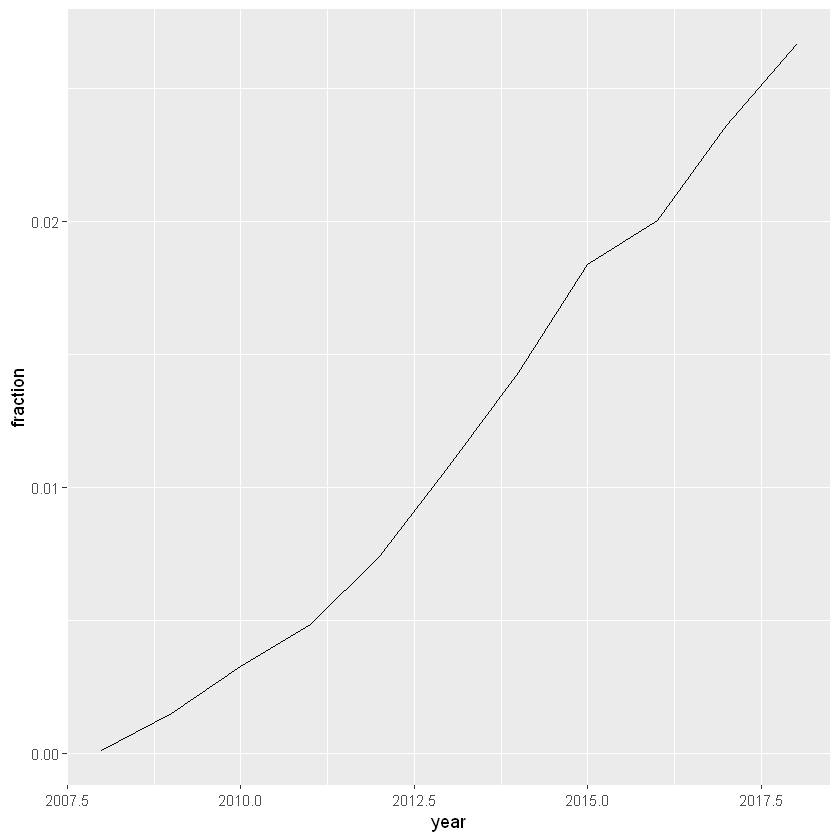

In [6]:
# Loading ggplot2
library(ggplot2)

# Creating a line plot of fraction over time
ggplot(r_over_time, aes(x = year, y = fraction)) +
    geom_line()

## 5. How about dplyr and ggplot2?

I am curious about tags for dplyr and ggplot2, other popular packages. The guiding question is: Are each of those tags increasing as a fraction of overall questions? Are any of them decreasing?

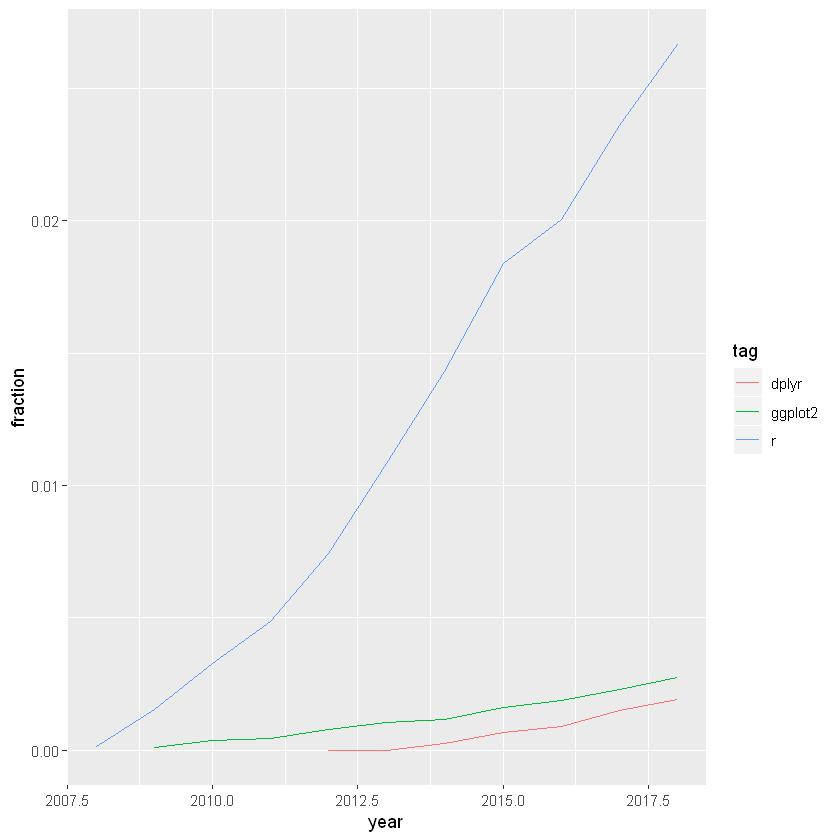

In [7]:
# A vector of selected tags
selected_tags <- c("r", "dplyr", "ggplot2")

# Filtering for those tags
selected_tags_over_time <- by_tag_year_fraction %>%
    filter(tag %in% selected_tags)

# Plotting tags over time on a line plot using color to represent tag
ggplot(selected_tags_over_time, aes(x = year, y = fraction, color = tag))+
    geom_line()

## 6. What are the most asked-about tags?

It's important to take a step back and also look at tags that have the most questions in history. 

In [8]:
# Finding total number of questions for each tag
sorted_tags <- by_tag_year %>%
        group_by(tag) %>%
        summarize(tag_total = sum(number)) %>%
        arrange(desc(tag_total)) 

# Printing the new table
sorted_tags

tag,tag_total
javascript,1632049
java,1425961
c#,1217450
php,1204291
android,1110261
python,970768
jquery,915159
html,755341
c++,574263
ios,566075


## 7. How have large programming languages changed over time?

I am also curious about which tags might be shrinking. A good place to start is to plot the tags that were the most-asked about of all time, including JavaScript, Java and C#.

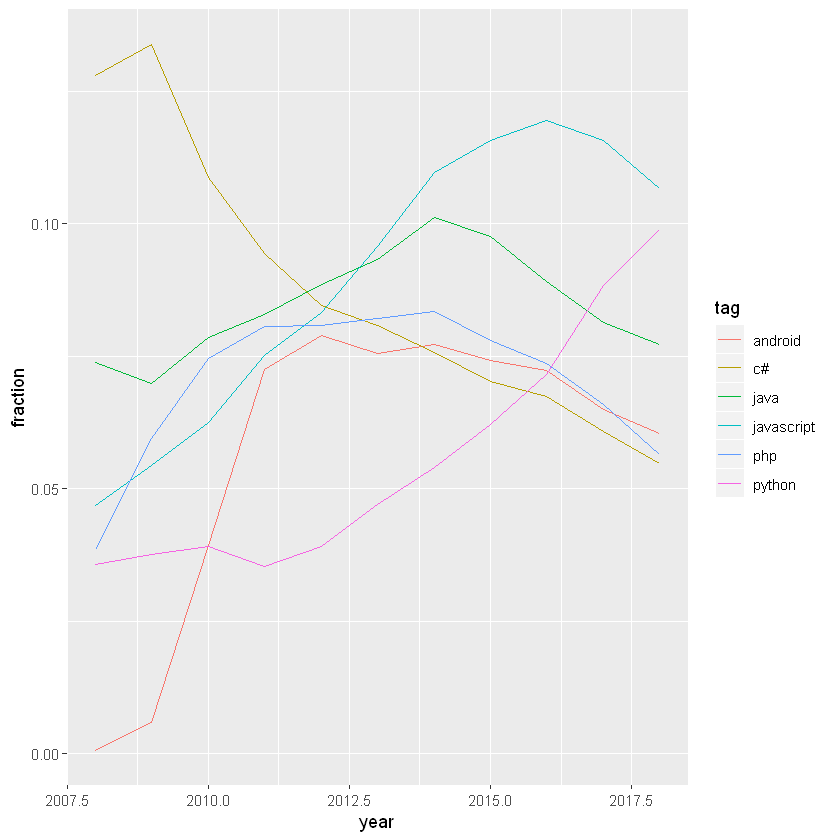

In [9]:
# Getting the six largest tags
highest_tags <- head(sorted_tags$tag)

# Filtering for the six largest tags
by_tag_subset <- by_tag_year_fraction %>%
    filter(tag %in% highest_tags[1:6])

# Plotting tags over time on a line plot using color to represent tag
ggplot(by_tag_subset, aes(x = year, y = fraction, color = tag))+
    geom_line()

## 8. Some more tags

Based on the graph, it is clear that C# gets fewer questions than it used to, and Python has grown a lot.

This Stack Overflow data is incredibly versatile. We can analyze any programming language, web framework, or tool where we'd like to see their change over time. Combined with the reproducibility of R and its libraries, we have ourselves a powerful method of uncovering insights about technology.

To demonstrate its versatility, let's check out how three big mobile operating systems (Android, iOS, and Windows Phone) have compared in popularity over time. But remember: this code can be modified simply by changing the tag names!

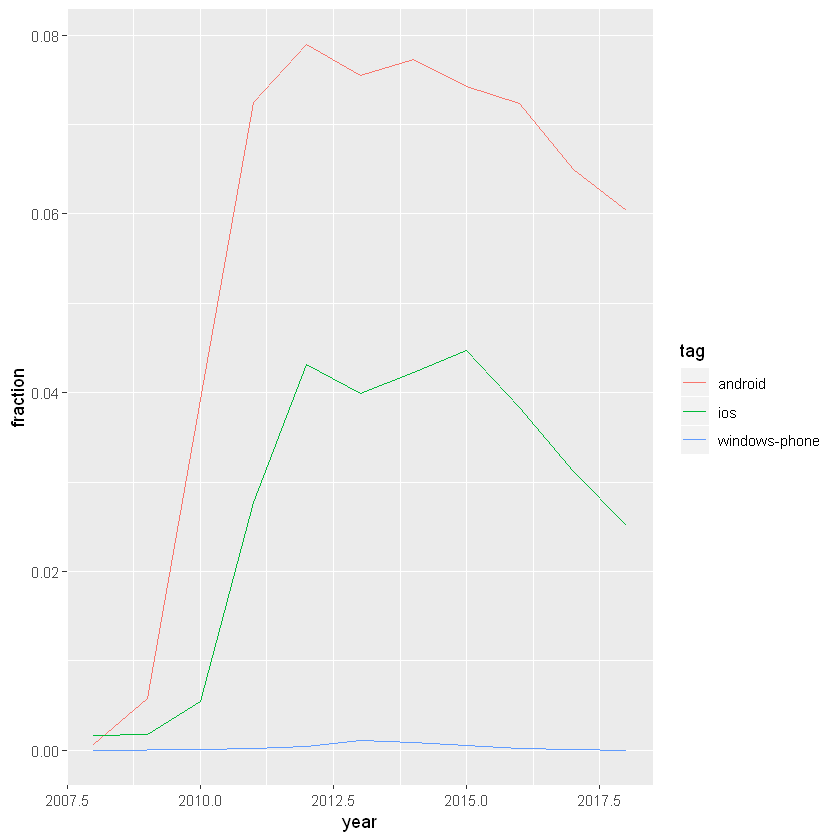

In [10]:
# Get tags of interest
my_tags <- c("android", "ios", "windows-phone")

# Filter for those tags
by_tag_subset <- by_tag_year_fraction %>%
    filter(tag %in% my_tags)

# Plot tags over time on a line plot using color to represent tag
ggplot(by_tag_subset, aes(x = year, y = fraction, color = tag))+
    geom_line()